In [53]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
df = pd.read_csv('data.csv')
df['idx'] = df['idx'].astype(int)


def compute_class(idx):
    if idx < 510:
        return chr(ord('A') + (idx // 30))
    elif 510 <= idx < 520:
        return 'Q'
    elif 520 <= idx < 790:
        return chr(ord('A') + ((idx - 10) // 30))
    elif 790 <= idx < 820:
        return 'CMD_1'
    elif 820 <= idx < 850:
        return 'CMD_2'
    elif idx >= 850:
        return 'CMD_3'

df['class'] = df['idx'].apply(compute_class)
print(df)

     idx    x1     y1     z1     x2    y2     z2     x3     y3     z3     x4  \
0      0 -90.0   5.79  33.51   4.53 -90.0  32.05  -9.53  25.99  30.54  -4.08   
1      1 -90.0   1.77  33.79   4.69 -90.0  51.96  -7.60  21.50  40.50  -2.05   
2      2 -90.0   1.60  33.48   4.40 -90.0  47.88  -7.18  21.45  40.37  -1.97   
3      3 -90.0   2.10  33.59   3.54 -90.0  42.48  -7.79  21.51  39.80  -2.55   
4      4 -90.0   0.43  34.00   6.60 -90.0  52.40  -7.15  20.38  42.75  -1.53   
..   ...   ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
875  875 -90.0   3.31  17.90  25.27 -90.0   9.97  18.44   0.61  60.45   0.15   
876  876 -90.0  -9.52  35.61  14.29 -90.0  17.86  19.94  11.54  52.59   3.69   
877  877 -90.0 -20.25  22.55  29.44 -90.0  27.64  28.32  -2.16  52.64   9.15   
878  878 -90.0 -19.17  24.22  20.83 -90.0  25.25  28.19   2.99  62.70   9.06   
879  879 -90.0 -21.02  25.51  18.81 -90.0  24.64  35.51   4.10  57.16  13.19   

        y4     z4     x5     y5     z5 

In [60]:
feature_columns = [f'{a}{i}' for i in range(1, 7) for a in ['x', 'y', 'z']]

X = df[feature_columns]
y = df['class']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for k, v in class_mapping.items():
    print(f"{v} -> {k}")

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=(1.0 / 3.0), stratify=y_encoded)


0 -> A
1 -> B
2 -> C
3 -> CMD_1
4 -> CMD_2
5 -> CMD_3
6 -> D
7 -> E
8 -> F
9 -> G
10 -> H
11 -> I
12 -> J
13 -> K
14 -> L
15 -> M
16 -> N
17 -> O
18 -> P
19 -> Q
20 -> R
21 -> S
22 -> T
23 -> U
24 -> V
25 -> W
26 -> X
27 -> Y
28 -> Z


In [56]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

c:\Users\Georgescu Andrei\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

Accuracy: 0.9863945578231292

Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.90      0.95        10
           B       1.00      1.00      1.00        10
           C       0.91      1.00      0.95        10
       CMD_1       1.00      1.00      1.00        10
       CMD_2       1.00      1.00      1.00        10
       CMD_3       1.00      1.00      1.00        10
           D       1.00      1.00      1.00        10
           E       0.83      1.00      0.91        10
           F       1.00      0.80      0.89        10
           G       1.00      1.00      1.00        10
           H       1.00      1.00      1.00        10
           I       0.91      1.00      0.95        10
           J       1.00      1.00      1.00        10
           K       1.00      1.00      1.00        10
           L       1.00      1.00      1.00        10
           M       1.00      1.00      1.00        10
           N       1.00     

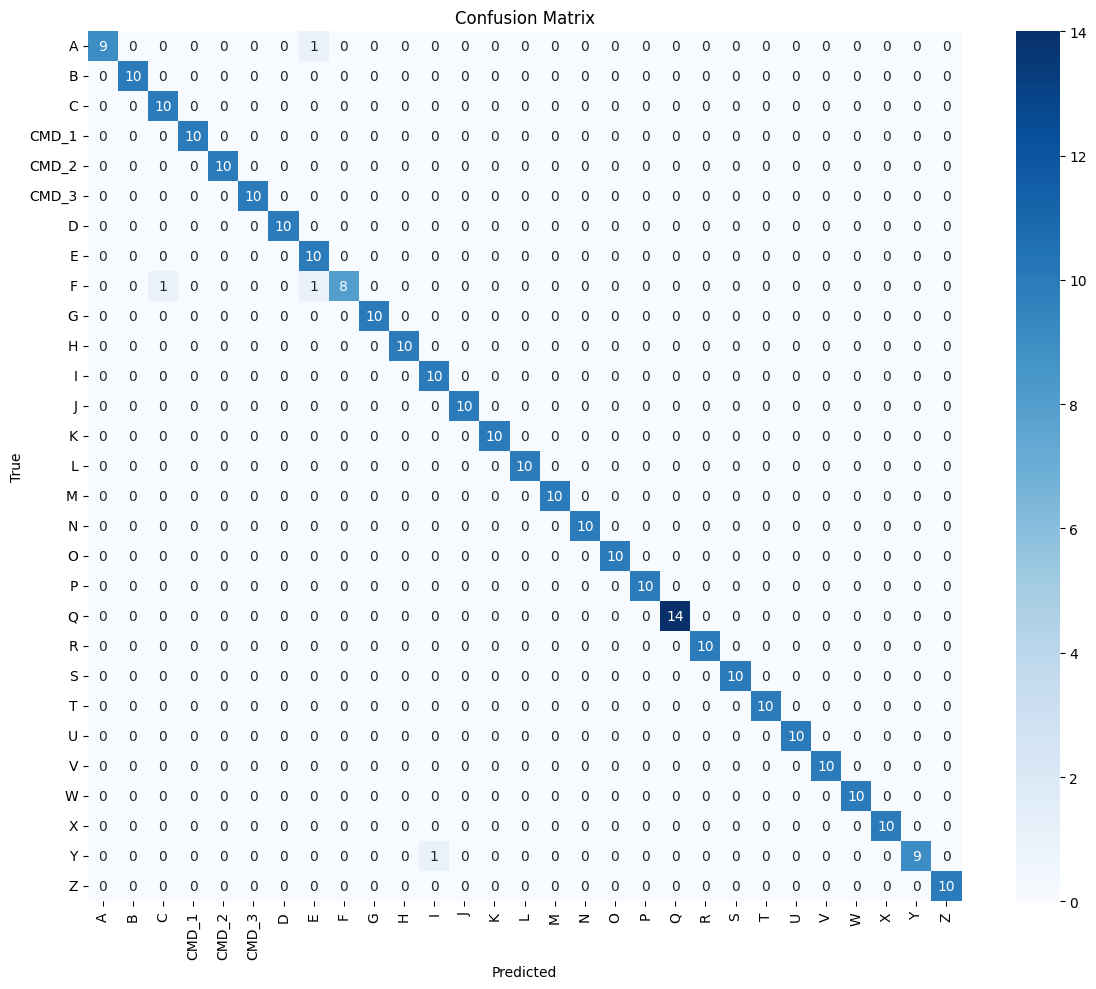

In [57]:
y_pred = model.predict(X_test)

# Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
cm = confusion_matrix(y_test, y_pred, labels=label_encoder.transform(label_encoder.classes_))

# Plot using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
def to_c_array(name, array):
    s = f"float {name}[{array.shape[0]}][{array.shape[1]}] = {{\n" if array.ndim == 2 else f"float {name}[{array.shape[0]}] = {{\n"
    for row in array:
        if isinstance(row, np.ndarray):
            s += "  {" + ", ".join(f"{v:.6f}f" for v in row) + "},\n"
        else:
            s += f"  {row:.6f}f,\n"
    s += "};\n"
    return s

print(to_c_array("weights", model.coef_))
print(to_c_array("bias", model.intercept_))

float weights[29][18] = {
  {0.020788f, -0.071457f, 0.015932f, 0.104464f, -0.106686f, 0.043107f, -0.270470f, 0.107691f, 0.018200f, 0.139409f, -0.022941f, -0.048483f, 0.113354f, -0.018239f, -0.023283f, 0.016364f, -0.002773f, 0.130293f},
  {-0.002688f, 0.038491f, 0.037902f, -0.046227f, 0.043388f, 0.082828f, -0.023184f, -0.060776f, 0.022000f, -0.009654f, -0.036368f, 0.025981f, -0.018016f, -0.043599f, 0.025754f, -0.060941f, -0.094153f, -0.026802f},
  {0.028316f, -0.011203f, -0.000079f, -0.082432f, 0.123511f, -0.003056f, 0.075207f, 0.033419f, 0.038276f, 0.036462f, 0.034102f, 0.008643f, -0.012593f, -0.042267f, 0.175514f, -0.049316f, -0.107583f, 0.108644f},
  {0.068672f, -0.026828f, -0.087496f, 0.052661f, -0.014583f, 0.014588f, 0.041691f, 0.007151f, 0.079751f, 0.005918f, -0.022390f, 0.134853f, 0.013817f, -0.021643f, 0.071037f, 0.016997f, -0.038075f, 0.008165f},
  {-0.014045f, 0.004897f, -0.019182f, 0.047734f, -0.047746f, -0.079435f, 0.012472f, -0.071604f, 0.031295f, -0.015843f, -0.024218f, 0.